In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Загрузка данных
df = pd.read_csv('best-selling-books.csv')

# Обработка пропусков: заменим NaN в Genre на 'Unknown'
df['Genre'] = df['Genre'].fillna('Unknown')

# Разделение жанров на несколько
df['Genre'] = df['Genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else ['Unknown'])

# Уплощение списка жанров
df_exploded = df.explode('Genre')

# Фильтрация жанров, встречающихся 2 и более раз (исключая 'Unknown')
genre_counts = df_exploded['Genre'].value_counts()
df_exploded = df_exploded[df_exploded['Genre'].isin(genre_counts[genre_counts >= 2].index) & (df_exploded['Genre'] != 'Unknown')]

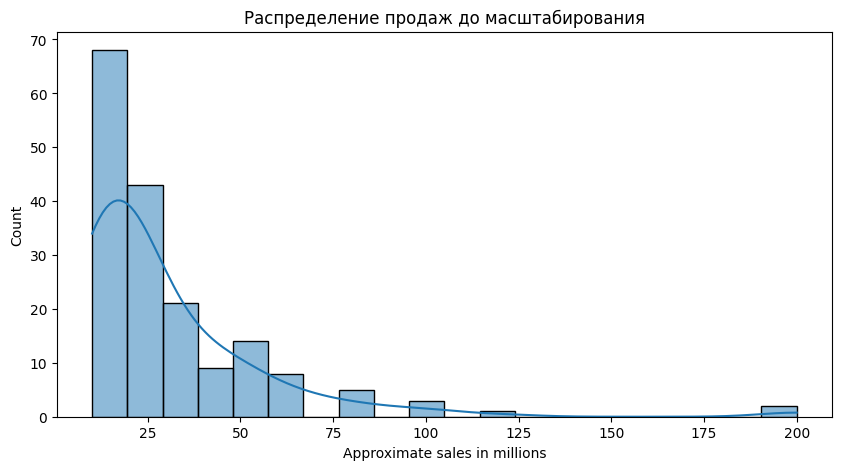

In [4]:
# Визуализация до обработки
plt.figure(figsize=(10, 5))
sns.histplot(df['Approximate sales in millions'], bins=20, kde=True)
plt.title('Распределение продаж до масштабирования')
plt.show()

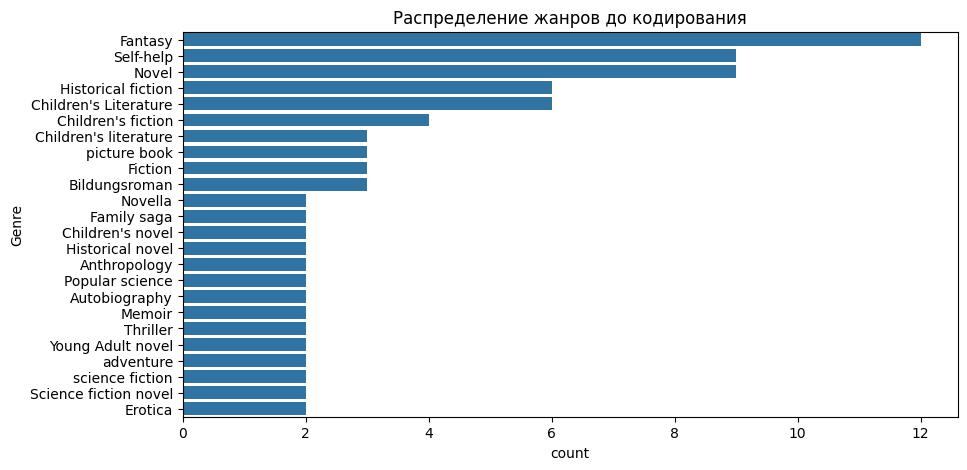

In [5]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df_exploded['Genre'], order=df_exploded['Genre'].value_counts().index)
plt.title('Распределение жанров до кодирования')
plt.show()

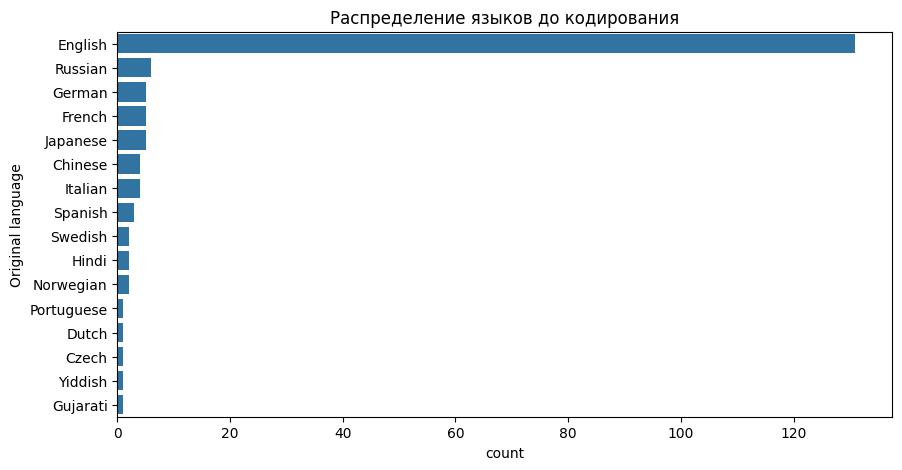

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Original language'], order=df['Original language'].value_counts().index)
plt.title('Распределение языков до кодирования')
plt.show()

In [7]:
# Кодирование категориальных признаков
label_encoder_genre = LabelEncoder()
label_encoder_language = LabelEncoder()

# Кодируем жанры (исключаем 'Unknown' уже на этом этапе)
df_exploded['Genre'] = label_encoder_genre.fit_transform(df_exploded['Genre'])
df['Original language'] = label_encoder_language.fit_transform(df['Original language'])

# Масштабирование числовых данных
scaler = StandardScaler()
df[['Approximate sales in millions']] = scaler.fit_transform(df[['Approximate sales in millions']])

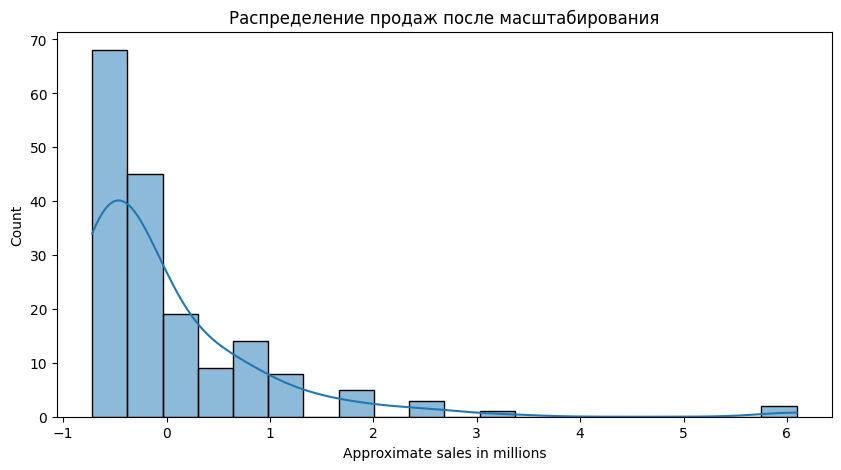

In [8]:
# Визуализация после обработки
plt.figure(figsize=(10, 5))
sns.histplot(df['Approximate sales in millions'], bins=20, kde=True)
plt.title('Распределение продаж после масштабирования')
plt.show()


Расшифровка кодированных значений жанров:
0 - Anthropology
1 - Autobiography
2 - Bildungsroman
3 - Children's Literature
4 - Children's fiction
5 - Children's literature
6 - Children's novel
7 - Erotica
8 - Family saga
9 - Fantasy
10 - Fiction
11 - Historical fiction
12 - Historical novel
13 - Memoir
14 - Novel
15 - Novella
16 - Popular science
17 - Science fiction novel
18 - Self-help
19 - Thriller
20 - Young Adult novel
21 - adventure
22 - picture book
23 - science fiction


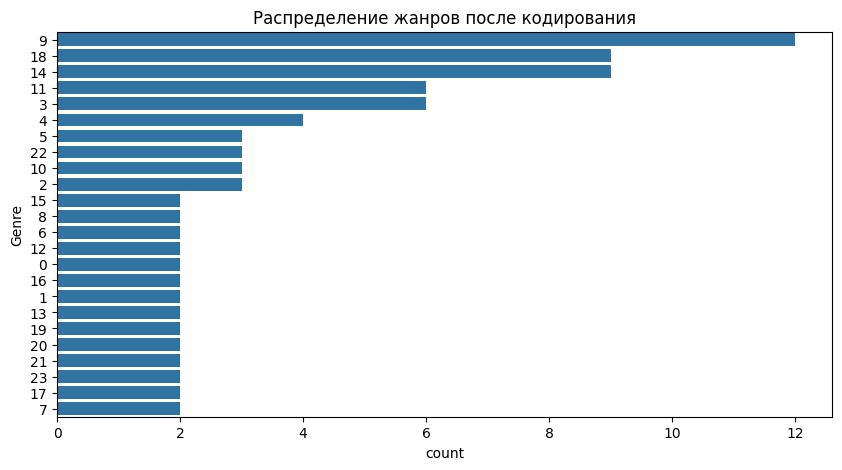

In [9]:
# Расшифровка чисел для жанров
print("\nРасшифровка кодированных значений жанров:")
for i, label in enumerate(label_encoder_genre.classes_):
    print(f'{i} - {label}')

plt.figure(figsize=(10, 5))
sns.countplot(y=df_exploded['Genre'], order=df_exploded['Genre'].value_counts().index)
plt.title('Распределение жанров после кодирования')
plt.show()


Расшифровка кодированных значений языков:
0 - Chinese
1 - Czech
2 - Dutch
3 - English
4 - French
5 - German
6 - Gujarati
7 - Hindi
8 - Italian
9 - Japanese
10 - Norwegian
11 - Portuguese
12 - Russian
13 - Spanish
14 - Swedish
15 - Yiddish


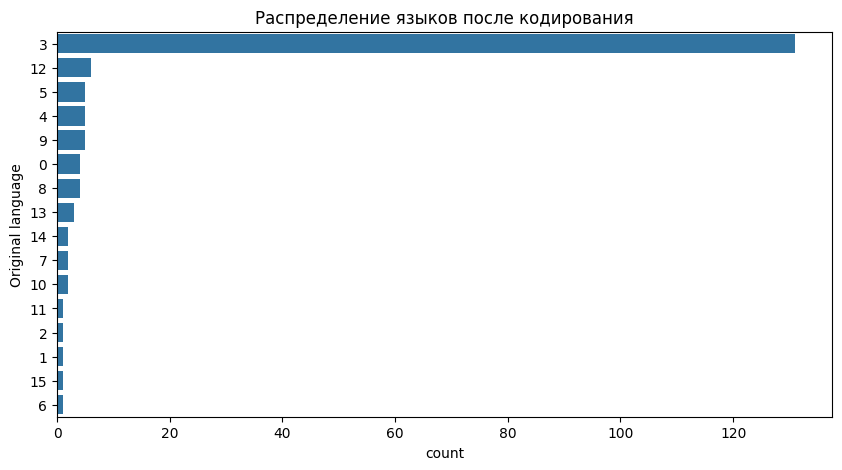

In [10]:
# Расшифровка чисел для языка
print("\nРасшифровка кодированных значений языков:")
for i, label in enumerate(label_encoder_language.classes_):
    print(f'{i} - {label}')

plt.figure(figsize=(10, 5))
sns.countplot(y=df['Original language'], order=df['Original language'].value_counts().index)
plt.title('Распределение языков после кодирования')
plt.show()